GIF generado en 'curva_precision.gif'


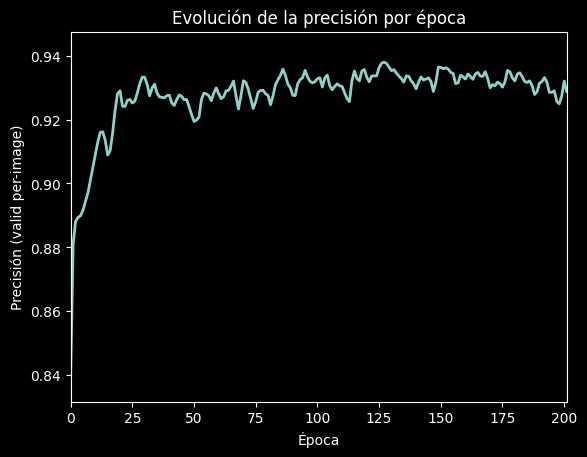

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# --- 1. Carga de datos ---
df = pd.read_csv('wandb.csv')
df['epoch'] = df['epoch'].astype(int)
df['acc'] = df['apricot-butterfly-13 - valid_per_image_acc'].astype(float)

# --- 2. Localizar la época 100 ---
# Suponemos que existe exactamente un registro con epoch == 100
idx100 = df.index[df['epoch'] == 100][0]

# --- 3. Preparar la figura ---
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_xlim(df['epoch'].min(), df['epoch'].max())
ax.set_ylim(df['acc'].min()*0.99, df['acc'].max()*1.01)
ax.set_xlabel('Época')
ax.set_ylabel('Precisión (valid per-image)')
ax.set_title('Evolución de la precisión por época')

# --- 4. Definir lista de frames con pausa en epoch 100 ---
# Recorre 0…idx100, luego repite idx100 20 veces, luego sigue con el resto
frames = list(range(idx100 + 1)) + [idx100]*20 + list(range(idx100 + 1, len(df)))

# --- 5. Función de actualización ---
def update(i):
    x = df['epoch'].iloc[:frames[i]+1]
    y = df['acc'].iloc[:frames[i]+1]
    line.set_data(x, y)
    return (line,)

# --- 6. Crear la animación ---
anim = FuncAnimation(
    fig,
    update,
    frames=len(frames),
    blit=True,
    interval=200  # milisegundos entre frames (ajústalo a tu gusto)
)

# --- 7. Guardar como GIF ---
writer = PillowWriter(fps=5)  # fotogramas por segundo, ajustable
anim.save('curva_precision.gif', writer=writer)

print("GIF generado en 'curva_precision.gif'")


GIF saved as accuracy_evolution.gif


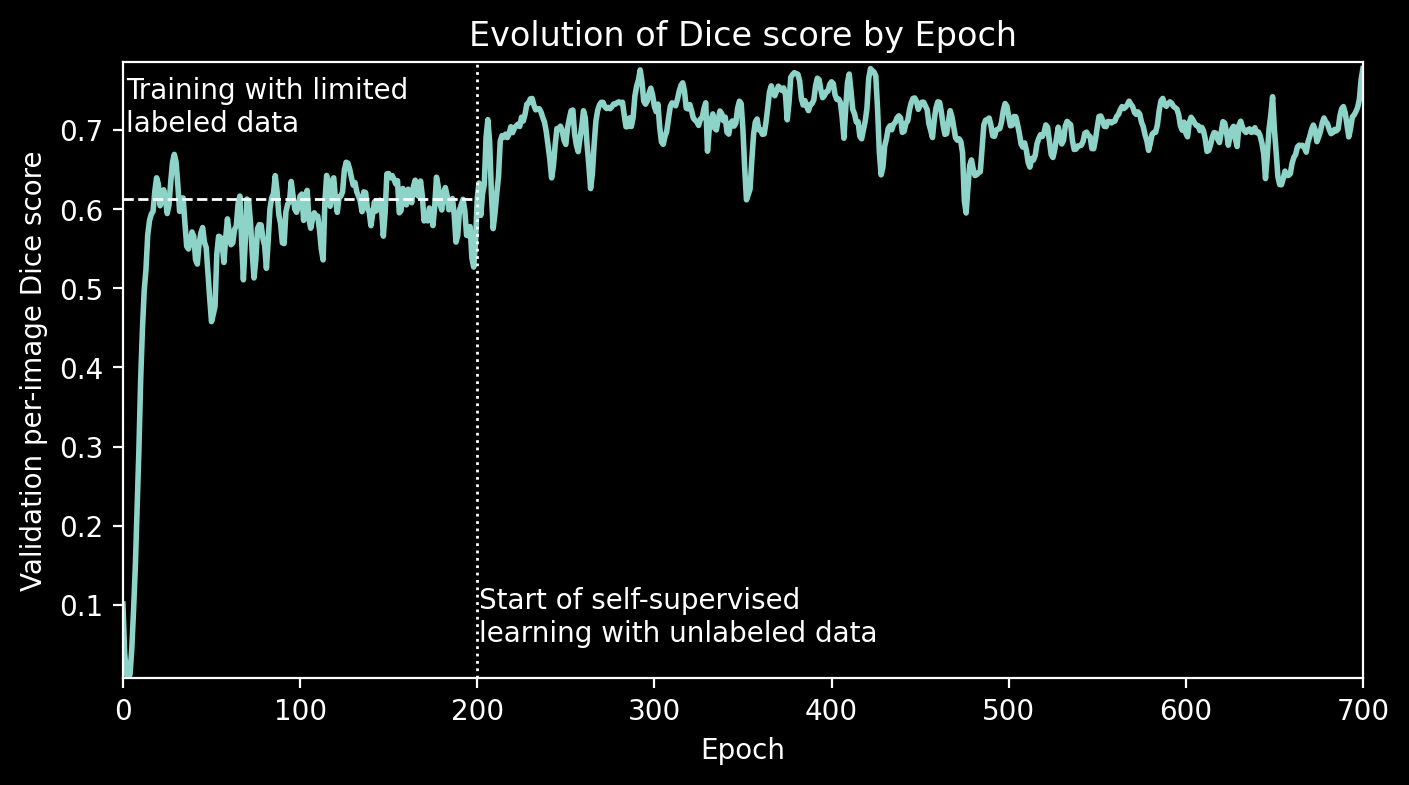

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200


# 1. Load your data
df = pd.read_csv('wandb.csv')
df['epoch'] = df['epoch'].astype(int)
df['accuracy'] = df['apricot-butterfly-13 - valid_dataset_f1'].astype(float)

# 2. Find the switch point at epoch 200
epoch_switch = 200
idx_switch = df.index[df['epoch'] == epoch_switch][0]
plateau_val = df['accuracy'].iloc[idx_switch]

# 3. Prepare the figure
fig, ax = plt.subplots(figsize=(8, 4))
line, = ax.plot([], [], lw=2)

ax.set_xlim(df['epoch'].min(), df['epoch'].max())
ax.set_ylim(df['accuracy'].min() * 0.99, df['accuracy'].max() * 1.01)
ax.set_xlabel('Epoch')
ax.set_ylabel('Validation per-image Dice score')
ax.set_title('Evolution of Dice score by Epoch')

# 4. Static annotations
# 4.1 Horizontal “plateau” line up to epoch 100
ax.hlines(
    y=plateau_val,
    xmin=df['epoch'].min(),
    xmax=epoch_switch,
    linestyle='--',           # singular
    linewidth=1
)
ax.text(
    x=df['epoch'].min() + 2,
    y=plateau_val + 0.1 * (ax.get_ylim()[1] - ax.get_ylim()[0]),
    s='Training with limited\nlabeled data',
    va='bottom'
)

# 4.2 Vertical line marking the switch
ax.axvline(
    x=epoch_switch,
    linestyle=':',            # singular
    linewidth=1
)
ax.text(
    x=epoch_switch + 1,
    y=ax.get_ylim()[0] + 0.05 * (ax.get_ylim()[1] - ax.get_ylim()[0]),
    s='Start of self-supervised\nlearning with unlabeled data',
    #rotation=90,
    va='bottom'
)

# 5. Build frames (with a little pause at the switch)
frames = list(range(idx_switch + 1)) + [idx_switch] * 60 + list(range(idx_switch + 1, len(df)))

# 6. Update function for FuncAnimation
def update(i):
    cur = frames[i]
    x = df['epoch'].iloc[:cur + 1]
    y = df['accuracy'].iloc[:cur + 1]
    line.set_data(x, y)
    return (line,)

# 7. Create animation
anim = FuncAnimation(
    fig, update,
    frames=len(frames),
    blit=True,
    interval=30  # ms between frames
)

# 8. Save to GIF
writer = PillowWriter(fps=30)
anim.save('accuracy_evolution.gif', writer=writer)

print("GIF saved as accuracy_evolution.gif")
